<span style="font-family: Open Sans; font-weight: 800; font-size: 40px; font-style: normal; text-align:center;">

Especialización Inteligecia Artificial - CEIA

</span>

<span style="font-family: Open Sans; font-weight: 700; font-size: 50px; font-style: normal; text-align:center;">

Análisis de datos 

Trabajo práctico integrador

</span>

<span style="font-family: Open Sans; font-weight: 400; font-size: 30px; font-style: normal;">

<u>Autores</u>:
- Karen Raczkowski
- Juan Ignacio Ribet
- FS

</span>

<span style="font-family: Open Sans; font-weight: 400; font-size: 30px; font-style: normal">

# LEGO Database

 - ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?
 - ¿Podría predecir a que temática pertenece un set basado en el contenido de este?

 </span>
 

 ![Data set Schema](https://rebrickable.com/static/img/diagrams/downloads_schema_v3.png)

<span style="font-family: Open Sans; font-weight: 100; font-size: 20px; font-style: normal;">

Para responder las preguntas planteadas vamos a utilizar los siguientes datasets que nos van a dar la información de lo que contiene cada set de Lego:

- themes
- sets
- inventories
- inventory_parts
- colors
- parts
- part_categories

</span>

### Importamos las librerías necesarias para el trabajo.

In [2]:
# Importamos librerías 
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import plotly.express as px

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluación de modelos de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

#Categorical transformations
import category_encoders as ce
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import LabelEncoder


# Partición de train-test set
from sklearn.model_selection import train_test_split

# Pipelines
from sklearn.pipeline import Pipeline

# Crear datasets
from sklearn.datasets import make_regression

# Training schemas
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold

from functools import reduce

from sklearn.feature_extraction import FeatureHasher

In [84]:
#Cargamos las urls donde se encuentran los datasets. Links obtenidos de https://rebrickable.com/downloads/

url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
url_sets ='https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'


# url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
# url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'
# url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
# url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
# url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'

In [86]:
#Creamos los DataFrames

themes = pd.read_csv(url_themes, delimiter=',') #(3.9 KB)
sets = pd.read_csv(url_sets, delimiter=',') #(379.9 KB)
inventories = pd.read_csv(url_inventories, delimiter=',') #(194.1 KB)
inventory_parts = pd.read_csv(url_inventory_parts, delimiter=',') #(9.9 MB)
colors = pd.read_csv(url_colors, delimiter=',') #(2.5 KB)
parts = pd.read_csv(url_parts, delimiter=',') #(839.0 KB)
part_categories = pd.read_csv(url_part_categories, delimiter=',') #(725 bytes)

# inventory_sets = pd.read_csv(url_inventory_sets, delimiter=',') #(14.1 KB)
# inventory_minifigs = pd.read_csv(url_inventory_minifigs, delimiter=',') #(76.2 KB)
# minifigs = pd.read_csv(url_minifigs, delimiter=',') #(223.2 KB)
# part_relationships = pd.read_csv(url_part_relationships, delimiter=',') #(149.0 KB)
# elements = pd.read_csv(url_elements, delimiter=',') #(586.8 KB)

In [5]:
# # Opcional: correr esto si arriba da SSLCertVerificationError

# import urllib.request
# import gzip
# import ssl

# # Create an SSL context with certificate verification disabled
# ssl_context = ssl.create_default_context()
# ssl_context.check_hostname = False
# ssl_context.verify_mode = ssl.CERT_NONE

# # Specify the URLs of the datasets
# url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
# url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
# url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'
# url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
# url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
# url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'
# url_sets = 'https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
# url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
# url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
# url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
# url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
# url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'

# try:
#     # Read the compressed CSV data with SSL context
#     themes_data = urllib.request.urlopen(url_themes, context=ssl_context)
#     colors_data = urllib.request.urlopen(url_colors, context=ssl_context)
#     part_categories_data = urllib.request.urlopen(url_part_categories, context=ssl_context)
#     parts_data = urllib.request.urlopen(url_parts, context=ssl_context)
#     part_relationships_data = urllib.request.urlopen(url_part_relationships, context=ssl_context)
#     elements_data = urllib.request.urlopen(url_elements, context=ssl_context)
#     sets_data = urllib.request.urlopen(url_sets, context=ssl_context)
#     minifigs_data = urllib.request.urlopen(url_minifigs, context=ssl_context)
#     inventories_data = urllib.request.urlopen(url_inventories, context=ssl_context)
#     inventory_parts_data = urllib.request.urlopen(url_inventory_parts, context=ssl_context)
#     inventory_sets_data = urllib.request.urlopen(url_inventory_sets, context=ssl_context)
#     inventory_minifigs_data = urllib.request.urlopen(url_inventory_minifigs, context=ssl_context)

#     # Decompress the data and read into DataFrames
#     themes = pd.read_csv(gzip.GzipFile(fileobj=themes_data), delimiter=',')
#     colors = pd.read_csv(gzip.GzipFile(fileobj=colors_data), delimiter=',')
#     part_categories = pd.read_csv(gzip.GzipFile(fileobj=part_categories_data), delimiter=',')
#     parts = pd.read_csv(gzip.GzipFile(fileobj=parts_data), delimiter=',')
#     part_relationships = pd.read_csv(gzip.GzipFile(fileobj=part_relationships_data), delimiter=',')
#     elements = pd.read_csv(gzip.GzipFile(fileobj=elements_data), delimiter=',')
#     sets = pd.read_csv(gzip.GzipFile(fileobj=sets_data), delimiter=',')
#     minifigs = pd.read_csv(gzip.GzipFile(fileobj=minifigs_data), delimiter=',')
#     inventories = pd.read_csv(gzip.GzipFile(fileobj=inventories_data), delimiter=',')
#     inventory_parts = pd.read_csv(gzip.GzipFile(fileobj=inventory_parts_data), delimiter=',')
#     inventory_sets = pd.read_csv(gzip.GzipFile(fileobj=inventory_sets_data), delimiter=',')
#     inventory_minifigs = pd.read_csv(gzip.GzipFile(fileobj=inventory_minifigs_data), delimiter=',')                                           

# except urllib.error.URLError as e:
#     print("An error occurred while accessing the URL:", e)

## Exploramos la informacion que contiene cada DataFrame que vamos a utilizar

Themes: Este dataset incluye información sobre temas de Lego. Cada tema recibe un número de identificación único ("id"), un nombre ("name") y (si es parte de un tema más grande) de qué tema es parte ("parent_id").

In [6]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [7]:
#Verificamos valores nulos
themes.isnull().sum()

id             0
name           0
parent_id    144
dtype: int64

In [8]:
#Verificamos tipos de variables
themes.dtypes

id             int64
name          object
parent_id    float64
dtype: object

In [33]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in themes.columns:
    print(i,':',   len(themes[i].unique()))

id : 465
name : 382
parent_id : 56


Sets: Este archivo contiene información sobre los sets de LEGO, incluido un número de identificación único para cada set ("set_num"), el nombre del set ("name"), el año en que se lanzó ("year"), su tema ("theme_id"), cuántas partes incluye ("num_parts") y URL que contienen fotos de cada set ("img_url").

In [9]:
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


In [10]:
#Verificamos valores nulos
sets.isnull().sum()

set_num      0
name         0
year         0
theme_id     0
num_parts    0
img_url      0
dtype: int64

In [11]:
#Verificamos tipos de variables
sets.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
img_url      object
dtype: object

In [34]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in sets.columns:
    print(i,':',   len(sets[i].unique()))

set_num : 21291
name : 18213
year : 73
theme_id : 458
num_parts : 1429
img_url : 21291


Inventories: Esta tabla contiene información sobre inventarios, incluida una identificación única ("id"), su versión ("version") y el número del set ("set_num").

In [12]:
inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [13]:
#Verificamos valores nulos
inventories.isnull().sum()

id         0
version    0
set_num    0
dtype: int64

In [14]:
#Verificamos tipos de variables
inventories.dtypes

id          int64
version     int64
set_num    object
dtype: object

In [35]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in inventories.columns:
    print(i,':',   len(inventories[i].unique()))

id : 36291
version : 16
set_num : 34675


Inventory_parts: Este dataset contiene información sobre los inventarios de piezas, incluido un número de identificación único ("inventory_id"), el número de pieza ("part_num"), el color de la pieza ("color_id"), cuántas de ellas se incluyen ("quantity") y si se trata de un repuesto ("is_spare").

In [15]:
inventory_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,stickerupn0077,9999,1,f,NaN
3,1,upn0342,0,1,f,NaN
4,1,upn0350,25,1,f,NaN


In [16]:
#Verificamos valores nulos
inventory_parts.isnull().sum()

inventory_id       0
part_num           0
color_id           0
quantity           0
is_spare           0
img_url         8237
dtype: int64

In [17]:
#Verificamos tipos de variables
inventory_parts.dtypes

inventory_id     int64
part_num        object
color_id         int64
quantity         int64
is_spare        object
img_url         object
dtype: object

In [37]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in inventory_parts.columns:
    print(i,':',   len(inventory_parts[i].unique()))

inventory_id : 31764
part_num : 50049
color_id : 212
quantity : 379
is_spare : 2
img_url : 72680


Parts: Este dataset incluye información sobre piezas de lego, incluido un número de identificación único para cada pieza ("part_num"), el nombre de la pieza ("name"), la categoría de la que proviene ("part_cat_id") y su material ("part_material").

In [20]:
parts.head()

,part_num,name,part_cat_id,part_material
0,003381,Sticker Sheet for Set 663-1,58,Plastic
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic
3,003429,Sticker Sheet for Set 1550-1,58,Plastic
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic


In [21]:
#Verificamos valores nulos
parts.isnull().sum()

part_num         0
name             0
part_cat_id      0
part_material    0
dtype: int64

In [19]:
#Verificamos tipos de variables
parts.dtypes

part_num         object
name             object
part_cat_id       int64
part_material    object
dtype: object

In [36]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in parts.columns:
    print(i,':',   len(parts[i].unique()))

part_num : 51604
name : 51099
part_cat_id : 66
part_material : 6


Colors: Esta data contiene información sobre los colores de LEGO, incluida una identificación única para cada color ("id"), su nombre ("name") y el valor RGB aproximado ("rgb"), y si es transparente ("is_trans").

In [22]:
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [23]:
#Verificamos valores nulos
colors.isnull().sum()

id          0
name        0
rgb         0
is_trans    0
dtype: int64

In [24]:
#Verificamos tipos de variables
colors.dtypes

id           int64
name        object
rgb         object
is_trans    object
dtype: object

In [38]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in colors.columns:
    print(i,':',   len(colors[i].unique()))

id : 223
name : 223
rgb : 194
is_trans : 2


Part_categories: Este dataset incluye información sobre la categoría de la pieza ("name") y una identificación única para esa categoría de pieza ("id").

In [25]:
part_categories.head()

,id,name
0,1,Baseplates
1,3,Bricks Sloped
2,4,"Duplo, Quatro and Primo"
3,5,Bricks Special
4,6,Bricks Wedged


In [26]:
#Verificamos los valores nulos
part_categories.isnull().sum()

id      0
name    0
dtype: int64

In [39]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in part_categories.columns:
    print(i,':',   len(part_categories[i].unique()))

id : 66
name : 66


# ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?

Para responder la primer pregunta utilizamos la informacion del DataFrame 'sets'.

In [27]:
year = sets['year'].sort_values().unique()

#Calculamos la media de cantidad de piezas de cada set por año y armamos un dataframe
sets_mean_size_year = np.array(sets[['year','num_parts']].groupby(by='year').mean())[:,0].round(0)
sets_size_evolution = pd.DataFrame(sets_mean_size_year, year, columns=['sets_mean_size'])
sets_size_evolution

,sets_mean_size
1949,100.0
1950,1.0
1953,12.0
1954,8.0
1955,12.0
...,...
2019,189.0
2020,210.0
2021,233.0
2022,284.0


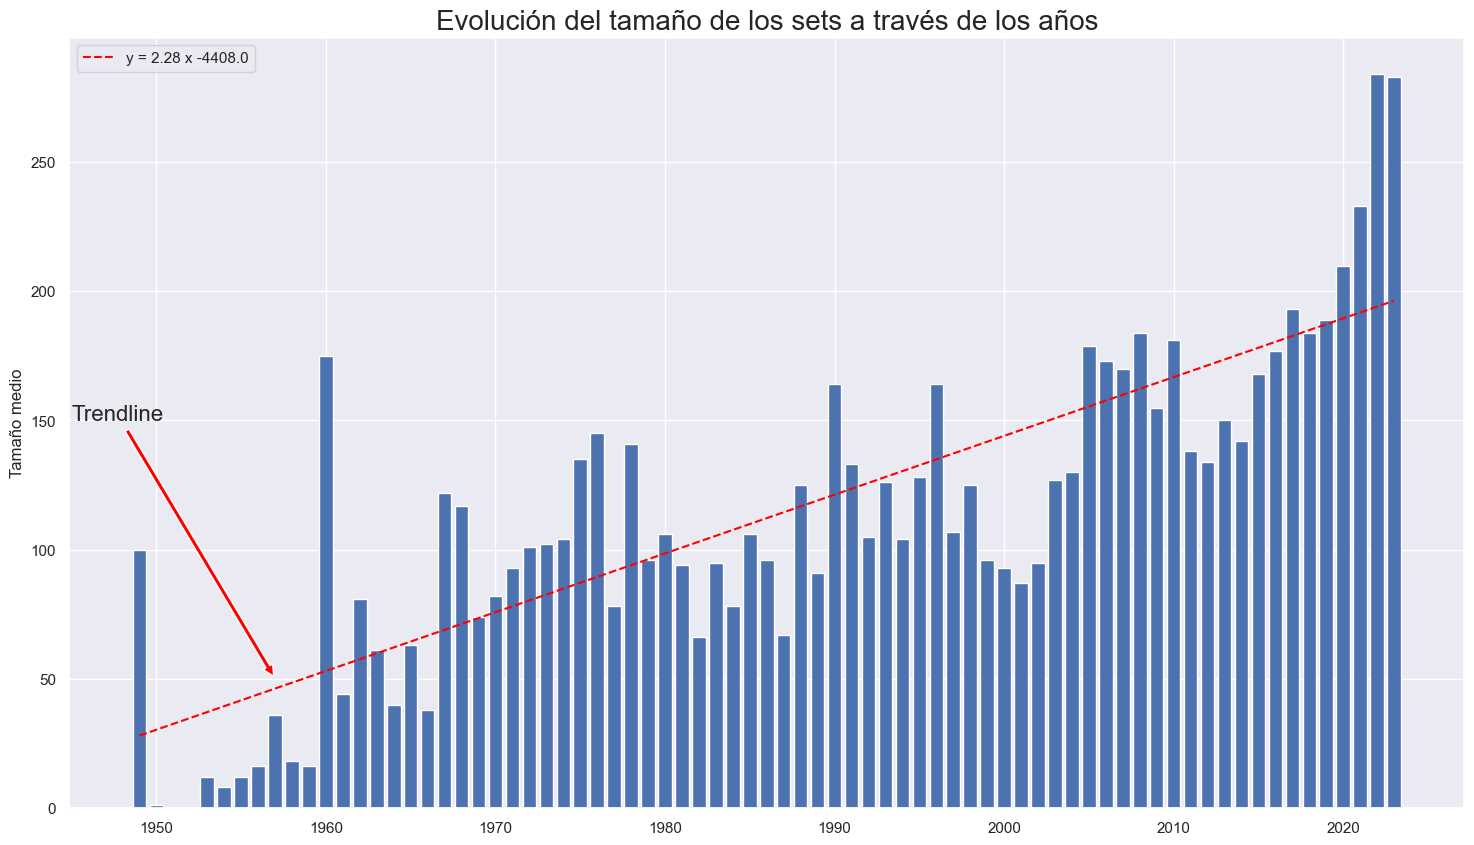

In [28]:
#Graficamos la evolución de la cantidad de piezas media por año.

z = np.polyfit(year, sets_mean_size_year, 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize=(18,10))
ax.bar(year, sets_mean_size_year)
ax.set_ylabel('Tamaño medio')
ax.plot(year, p(year), c='red', linestyle='dashed', label = f'y = {p.c.round(2)[0]} x {p.c.round(0)[1]}')
ax.set_title('Evolución del tamaño de los sets a través de los años',fontsize=20)
ax.annotate('Trendline',(1957,50), xytext=(1945,150), fontsize=16, arrowprops=dict(arrowstyle='simple', facecolor='red'))
ax.legend(loc='upper left')
plt.show()

#### Se puede observar en el grafico como la media de la cantidad de piezas de cada set fue evolucionando a través de los años. La línea de tendencia es creciente con la fórmula mostrada.

# ¿Podría predecir a que temática pertenece un set basado en el contenido de este?

Para responder esta pregunta vamos a unir los DataFrames para poder obtener la información de que piezas contiene cada set y las características de las mismas.

Pero antes vamos a realizar una exploracion de los datasets con un ejemplo para poder entender como obtener la información.

In [40]:
#Buscamos un ejemplo de set en 'sets', elegimos un set icónico como es la torre Eiffel.
sets[sets['set_num'] == '10307-1']


,set_num,name,year,theme_id,num_parts,img_url
399,10307-1,Eiffel Tower,2022,721,10001,https://cdn.rebrickable.com/media/sets/10307-1...


<img src="https://cdn.rebrickable.com/media/sets/10307-1.jpg"  width="300" height="600">

In [41]:
#Buscamos el mismo set en 'inventories'
inventories[inventories['set_num'] == '10307-1']

,id,version,set_num
34049,150356,1,10307-1


In [43]:
#Tomamos el id de 'inventories' y observamos que piezas contiene.
inventory_parts[inventory_parts['inventory_id'] == 150356]

,inventory_id,part_num,color_id,quantity,is_spare,img_url
1087735,150356,11090,72,32,f,https://cdn.rebrickable.com/media/parts/elemen...
1087736,150356,11153,72,8,f,https://cdn.rebrickable.com/media/parts/elemen...
1087737,150356,11203,72,8,f,https://cdn.rebrickable.com/media/parts/elemen...
1087738,150356,11211,71,4,f,https://cdn.rebrickable.com/media/parts/elemen...
1087739,150356,11212,72,20,f,https://cdn.rebrickable.com/media/parts/elemen...
...,...,...,...,...,...,...
1088040,150356,98138,0,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1088041,150356,99563,72,72,f,https://cdn.rebrickable.com/media/parts/elemen...
1088042,150356,99780,72,20,f,https://cdn.rebrickable.com/media/parts/elemen...
1088043,150356,99781,72,40,f,https://cdn.rebrickable.com/media/parts/elemen...


In [44]:
#Verificamos que la suma de las partes da el total de piezas que figuraba en 'sets'.
inventory_parts[(inventory_parts['inventory_id'] == 150356) & (inventory_parts['is_spare'] == 'f')]['quantity'].sum()

10001

Para poder relacionar las temáticas con lo que contiene cada set tengo que unir primero el dataset 'themes' con 'set'.

Pero primero vamos clasificar las temáticas 'hijos' con el nombre de las temáticas 'padres' para reducir la variable en el set 'themes'.

In [51]:
#Los valores NaN son las tematicas 'padres'.
D = {}
for i , j in zip(themes[themes['parent_id'].isnull()]['id'], themes[themes['parent_id'].isnull()]['name']):
    D[i] = j
names = themes['name'].copy()
themes['themes_parent_name'] = names
themes

for i, j in D.items(): 
    themes.loc[themes['parent_id'] == i, 'themes_parent_name'] = j

themes

,id,name,parent_id,themes_parent_name
0,1,Technic,NaN,Technic
1,3,Competition,1.0,Technic
2,4,Expert Builder,1.0,Technic
3,16,RoboRiders,1.0,Technic
4,17,Speed Slammers,1.0,Technic
...,...,...,...,...
460,745,Disney 100,535.0,Collectible Minifigures
461,746,Database Sets,301.0,Other
462,747,Sonic The Hedgehog,NaN,Sonic The Hedgehog
463,748,Gabby’s Dollshouse,NaN,Gabby’s Dollshouse


In [53]:
#Eliminamos la columna 'name' y cambiamos los valores NaN por 0.
themes = themes.drop(columns='name')
themes['parent_id'] = themes['parent_id'].fillna(0)
themes['parent_id'] = themes['parent_id'].astype('int64')
themes

,id,parent_id,themes_parent_name
0,1,0,Technic
1,3,1,Technic
2,4,1,Technic
3,16,1,Technic
4,17,1,Technic
...,...,...,...
460,745,535,Collectible Minifigures
461,746,301,Other
462,747,0,Sonic The Hedgehog
463,748,0,Gabby’s Dollshouse


## Unimos los datasets

In [55]:
#Cambiamos los nombres de las columnas 'id' y 'name' por 'theme_id' y 'theme_name' en el data set 'themes'.
themes.rename(columns = {'id':'theme_id', 'name':'theme_name'}, inplace = True)

#Unimos los datasets 'sets' con 'themes' por la columna "theme_id" en el nuevo dataset 'sets_themes'
sets_themes = pd.merge(sets, themes, on="theme_id")
sets_themes

,set_num,name,year,theme_id,num_parts,img_url,parent_id,themes_parent_name
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,0,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,https://cdn.rebrickable.com/media/sets/002-1.jpg,0,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,https://cdn.rebrickable.com/media/sets/1030-1.jpg,0,Technic
3,1038-1,ERBIE the Robo-Car,1985,1,120,https://cdn.rebrickable.com/media/sets/1038-1.jpg,0,Technic
4,1039-1,Manual Control Set 1,1986,1,39,https://cdn.rebrickable.com/media/sets/1039-1.jpg,0,Technic
...,...,...,...,...,...,...,...,...
21286,M20-2566-10,Modulex Box - 10x Window 1 x 6 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-256...,0,Modulex
21287,M20-2575-10,Modulex Box - 10x Window 1 x 7 x 5,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,0,Modulex
21288,M20-2576-10,Modulex Box - 10x Window 1 x 7 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,0,Modulex
21289,M20-2586-10,Modulex Box - 10x Window 1 x 8 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-258...,0,Modulex


In [58]:
#Verificamos que la cantidad de filas se mantenga y que no se perdió información.
print('themes', themes.shape)
print('sets', sets.shape)
print('sets_themes', sets_themes.shape)

themes (465, 3)
sets (21291, 6)
sets_themes (21291, 8)


De este nuevo dataset la informacion que nos queremos quedar es con las columnas 'set_num' y 'themes_parent_name'.

La variable 'set_num' va a ser nuestro target en el dataset final y 'themes_parent_name' van a ser las clases.

In [61]:
#Armamos un dataset que tenga solo el número de set y la temática padre a la que pertenece.
set_num_themes_parent_name = sets_themes[['set_num', 'themes_parent_name']].copy()
set_num_themes_parent_name

,set_num,themes_parent_name
0,001-1,Technic
1,002-1,Technic
2,1030-1,Technic
3,1038-1,Technic
4,1039-1,Technic
...,...,...
21286,M20-2566-10,Modulex
21287,M20-2575-10,Modulex
21288,M20-2576-10,Modulex
21289,M20-2586-10,Modulex


In [62]:
#Al dataset 'inventories' le agregamos el nombre de la temática padre a la cual pertenece esa versión de set. Lo hacemos de esta manera y no con merge para evitar perder información.
for i, j in zip(set_num_themes_parent_name['set_num'], set_num_themes_parent_name['themes_parent_name']): 
    inventories.loc[inventories['set_num'] == i, 'themes_parent_name'] = j

inventories

,id,version,set_num,themes_parent_name
0,1,1,7922-1,Sports
1,3,1,3931-1,Friends
2,4,1,6942-1,Space
3,15,1,5158-1,Service Packs
4,16,1,903-1,System
...,...,...,...,...
36286,178943,1,fig-014014,NaN
36287,178944,1,fig-014015,NaN
36288,178945,1,fig-014016,NaN
36289,178946,1,fig-014017,NaN


### Ahora tenemos un Dataset que por cada valor único de: 'id + version + set_num', se indica a que temática padre pertenece.

In [70]:
#Cambiamos los nombres de las columnas 'inventory_id' y 'quantity' por 'id' y 'quantity_part' en el data set 'inventory_parts'.
inventory_parts.rename(columns = {'inventory_id':'id', 'quantity':'quantity_part'}, inplace = True)

#Unimos los datasets de 'inventories' y 'inventory_parts'
inventories_inventory_parts = pd.merge(inventories, inventory_parts, on="id")
inventories_inventory_parts

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare,img_url
0,1,1,7922-1,Sports,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,1,7922-1,Sports,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,1,7922-1,Sports,stickerupn0077,9999,1,f,NaN
3,1,1,7922-1,Sports,upn0342,0,1,f,NaN
4,1,1,7922-1,Sports,upn0350,25,1,f,NaN
...,...,...,...,...,...,...,...,...,...
1145176,178946,1,fig-014017,NaN,973c22h70pr6312,4,1,f,https://cdn.rebrickable.com/media/parts/elemen...
1145177,178947,1,fig-014018,NaN,3626cpr2375,70,1,f,https://cdn.rebrickable.com/media/parts/elemen...
1145178,178947,1,fig-014018,NaN,79688,0,1,f,https://cdn.rebrickable.com/media/parts/elemen...
1145179,178947,1,fig-014018,NaN,970c05,272,1,f,https://cdn.rebrickable.com/media/parts/elemen...


In [71]:
#Verificamos que la cantidad de filas se mantenga y que no se perdió información.
print('inventories', inventories.shape)
print('inventory_parts', inventory_parts.shape)
print('inventories_inventory_parts', inventories_inventory_parts.shape)

inventories (36291, 4)
inventory_parts (1145181, 6)
inventories_inventory_parts (1145181, 9)


In [72]:
#Eliminamos la columna 'img_url'.
inventories_inventory_parts = inventories_inventory_parts.drop(columns=['img_url'])

In [73]:
#Los valores nulos son los sets que pertenecen a la minifigs
inventories_inventory_parts[inventories_inventory_parts['themes_parent_name'].isnull()]

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare
762382,48649,1,fig-000001,NaN,20877,484,1,f
762383,48649,1,fig-000001,NaN,3626cpr1963,14,1,f
762384,48649,1,fig-000001,NaN,970c19,70,1,f
762385,48649,1,fig-000001,NaN,973c01h01pr3080,14,1,f
762386,48650,1,fig-000002,NaN,3626cpr1738,14,1,f
...,...,...,...,...,...,...,...,...
1145176,178946,1,fig-014017,NaN,973c22h70pr6312,4,1,f
1145177,178947,1,fig-014018,NaN,3626cpr2375,70,1,f
1145178,178947,1,fig-014018,NaN,79688,0,1,f
1145179,178947,1,fig-014018,NaN,970c05,272,1,f


In [74]:
#Como no vamos a trabajar con las minifigs eliminamos estas filas
inventories_inventory_parts= inventories_inventory_parts.dropna()
inventories_inventory_parts

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare
0,1,1,7922-1,Sports,48379c01,72,1,f
1,1,1,7922-1,Sports,48395,7,1,f
2,1,1,7922-1,Sports,stickerupn0077,9999,1,f
3,1,1,7922-1,Sports,upn0342,0,1,f
4,1,1,7922-1,Sports,upn0350,25,1,f
...,...,...,...,...,...,...,...,...
1145076,178728,2,21003-1,Architecture,6141,71,1,t
1145077,178728,2,21003-1,Architecture,6141,71,1,f
1145078,178728,2,21003-1,Architecture,6636,71,4,f
1145079,178728,2,21003-1,Architecture,75c20,71,1,t


In [75]:
#le agrego el rgb de los colores de cada parte
for i, j in zip(colors['id'], colors['rgb']): 
    inventories_inventory_parts.loc[inventories_inventory_parts['color_id'] == i, 'rgb'] = j

inventories_inventory_parts

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare,rgb
0,1,1,7922-1,Sports,48379c01,72,1,f,6C6E68
1,1,1,7922-1,Sports,48395,7,1,f,9BA19D
2,1,1,7922-1,Sports,stickerupn0077,9999,1,f,05131D
3,1,1,7922-1,Sports,upn0342,0,1,f,05131D
4,1,1,7922-1,Sports,upn0350,25,1,f,FE8A18
...,...,...,...,...,...,...,...,...,...
1145076,178728,2,21003-1,Architecture,6141,71,1,t,A0A5A9
1145077,178728,2,21003-1,Architecture,6141,71,1,f,A0A5A9
1145078,178728,2,21003-1,Architecture,6636,71,4,f,A0A5A9
1145079,178728,2,21003-1,Architecture,75c20,71,1,t,A0A5A9


In [90]:
#Cambiamos los nombres de las columnas 'id' y 'name' por 'part_cat_id' y 'cat_name' en el data set 'inventory_parts'.
part_categories.rename(columns = {'id':'part_cat_id', 'name':'cat_name'}, inplace = True)

#Unimos los datasets de 'parts' y 'part_categories'.
parts_cat = pd.merge(parts, part_categories, on="part_cat_id")
parts_cat

,part_num,name,part_cat_id,part_material,cat_name
0,003381,Sticker Sheet for Set 663-1,58,Plastic,Stickers
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic,Stickers
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic,Stickers
3,003429,Sticker Sheet for Set 1550-1,58,Plastic,Stickers
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic,Stickers
...,...,...,...,...,...
51599,clikupn0141,"Clikits Connector, Ring 10 x 10 x 1 for Pencil...",48,Plastic,Clikits
51600,clikupn0142,Clikits Rectangle 30 x 12 with 2 Slots & Tabs ...,48,Plastic,Clikits
51601,clikupn0143,Clikits Circle 10 x 10 (Pencil Holder Base),48,Plastic,Clikits
51602,clikupn0144,Clikits Container Cube Drawer,48,Plastic,Clikits


In [91]:
#Verificamos que la cantidad de filas se mantenga y que no se perdió información.
print('parts', parts.shape)
print('part_categories', part_categories.shape)
print('parts_cat', parts_cat.shape)

parts (51604, 4)
part_categories (66, 2)
parts_cat (51604, 5)


In [95]:
#Unimos los datasets de 'inventories_inventory_parts' y 'parts_cat' por 'part_num' para armar el dataframe final.
df_final_completo = pd.merge(inventories_inventory_parts, parts_cat, on="part_num")
df_final_completo

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare,rgb,name,part_cat_id,part_material,cat_name
0,1,1,7922-1,Sports,48379c01,72,1,f,6C6E68,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
1,738,1,7920-1,Sports,48379c01,0,1,f,05131D,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
2,1733,1,7919-1,Sports,48379c01,1,1,f,0055BF,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
3,2304,1,7923-1,Sports,48379c01,1,1,f,0055BF,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
4,3157,1,7918-1,Sports,48379c01,272,1,f,0A3463,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082776,176909,1,10323-1,Icons,98138pr0359,0,2,f,05131D,Tile Round 1 x 1 with Red Ghost print,67,Plastic,Tiles Round and Curved
1082777,176909,1,10323-1,Icons,98138pr0360,0,4,f,05131D,Tile Round 1 x 1 with Yellow PAC MAN print,67,Plastic,Tiles Round and Curved
1082778,177274,1,6476269-1,LEGO Brand Store,87079pr9920,15,1,f,FFFFFF,Tile 2 x 4 with 'I Heart LEGO STORE Battersea'...,19,Plastic,Tiles
1082779,177683,1,40634-1,Other,13251,308,1,f,352100,Hair Elaborate Knot Bun,65,Plastic,Minifig Headwear


### Verificamos las tematicas que mas se repiten y trabajar solo con ellas para reducir el tamaño del dataset y la cantidad distintas de clases

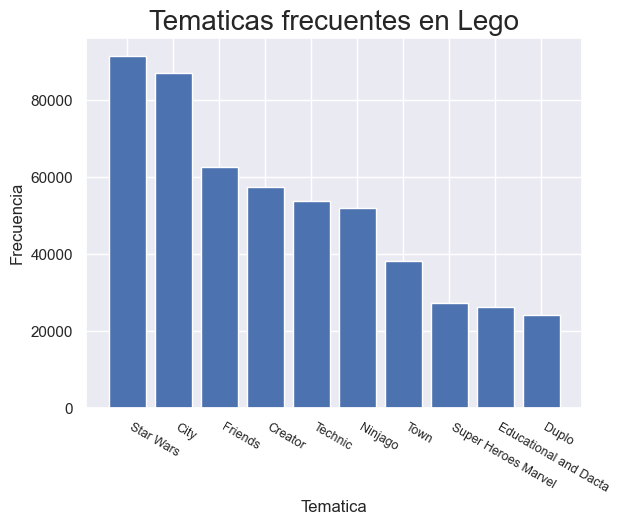

In [100]:
top_tematica = 10

fig, ax = plt.subplots()
ax.bar(df_final_completo['themes_parent_name'].value_counts()[:top_tematica].index, df_final_completo['themes_parent_name'].value_counts()[:top_tematica])
ax.set_xlabel('Tematica')
ax.set_ylabel('Frecuencia')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
ax.set_title("Tematicas frecuentes en Lego", fontsize = 20)
plt.show()

In [123]:
df_final = df_final_completo[df_final_completo['themes_parent_name'].isin(df_final_completo['themes_parent_name'].value_counts()[:top_tematica].index)]
df_final

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare,rgb,name,part_cat_id,part_material,cat_name
13,3,1,3931-1,Friends,2343,47,1,f,FCFCFC,Equipment Goblet / Glass,27,Plastic,Minifig Accessories
16,123,1,41135-1,Friends,2343,47,2,f,FCFCFC,Equipment Goblet / Glass,27,Plastic,Minifig Accessories
17,240,1,1821-1,Town,2343,14,1,f,F2CD37,Equipment Goblet / Glass,27,Plastic,Minifig Accessories
18,240,1,1821-1,Town,2343,7,4,f,9BA19D,Equipment Goblet / Glass,27,Plastic,Minifig Accessories
29,659,1,3383-1,Town,2343,47,1,f,FCFCFC,Equipment Goblet / Glass,27,Plastic,Minifig Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082755,176575,1,10997-1,Duplo,102287pr0001,1062,1,f,EBD800,"Duplo Figure Duck with Safety Vest, Medium Blu...",57,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1082756,176575,1,10997-1,Duplo,102287pr0002,1062,1,f,EBD800,"Duplo Figure Duck with Safety Vest, Red Cap, B...",57,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1082757,176575,1,10997-1,Duplo,102287pr0003,1062,1,f,EBD800,"Duplo Figure Duck with Safety Vest, Bright Gre...",57,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1082758,176575,1,10997-1,Duplo,3437pr0175,47,1,f,FCFCFC,Duplo Brick 2 x 2 with Diamonds print,4,Plastic,"Duplo, Quatro and Primo"


In [124]:
#Dejamos solo las variables que nos interesan y eliminamos el resto.
df_final = df_final.drop(columns=['id','version','color_id', 'is_spare', 'name', 'part_cat_id'])
df_final['rgb'] = df_final['rgb'].apply(lambda x : '#'+x)
df_final

,set_num,themes_parent_name,part_num,quantity_part,rgb,part_material,cat_name
13,3931-1,Friends,2343,1,#FCFCFC,Plastic,Minifig Accessories
16,41135-1,Friends,2343,2,#FCFCFC,Plastic,Minifig Accessories
17,1821-1,Town,2343,1,#F2CD37,Plastic,Minifig Accessories
18,1821-1,Town,2343,4,#9BA19D,Plastic,Minifig Accessories
29,3383-1,Town,2343,1,#FCFCFC,Plastic,Minifig Accessories
...,...,...,...,...,...,...,...
1082755,10997-1,Duplo,102287pr0001,1,#EBD800,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1082756,10997-1,Duplo,102287pr0002,1,#EBD800,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1082757,10997-1,Duplo,102287pr0003,1,#EBD800,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1082758,10997-1,Duplo,3437pr0175,1,#FCFCFC,Plastic,"Duplo, Quatro and Primo"


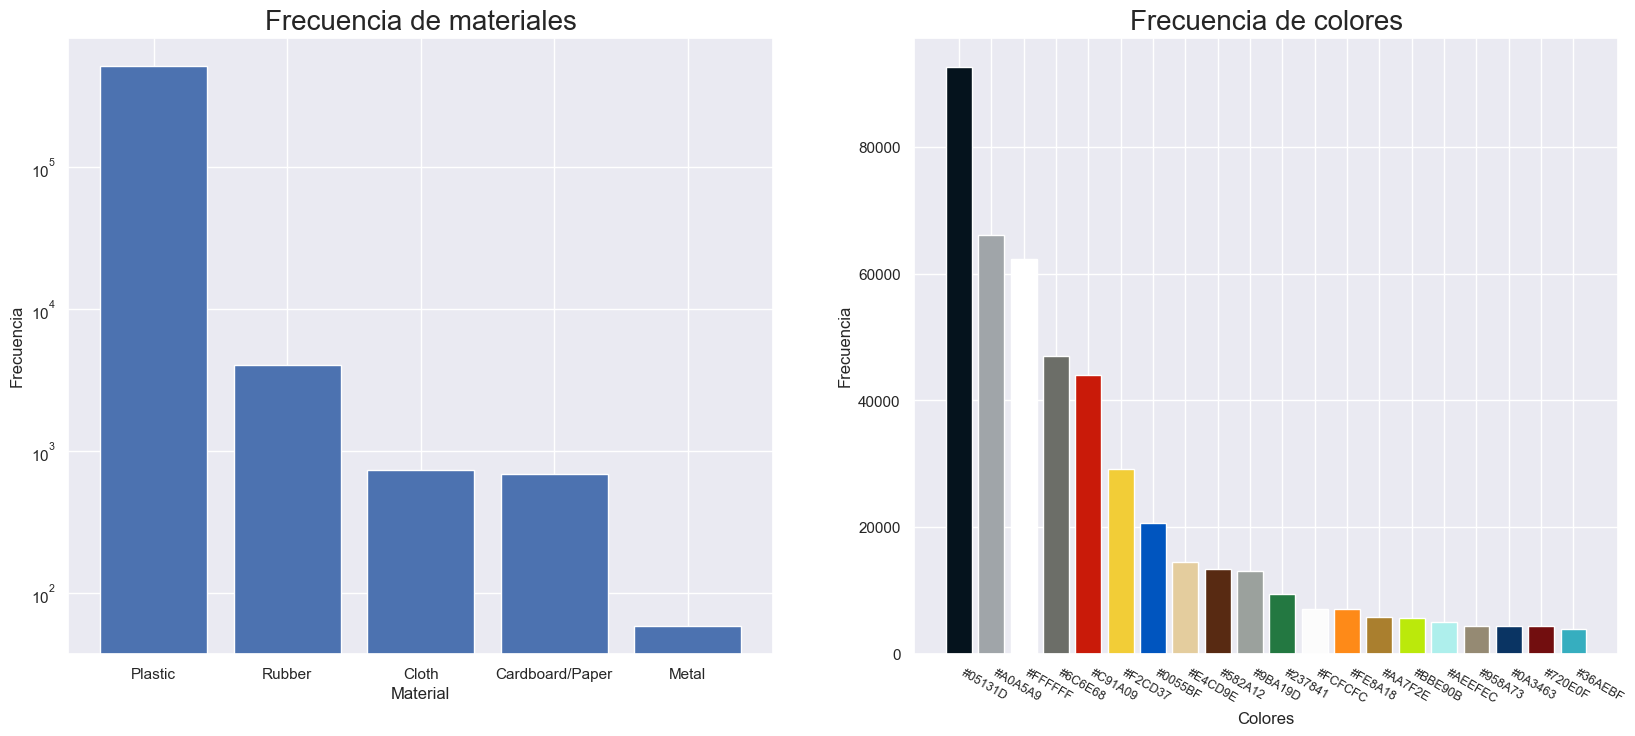

In [125]:
top_colores = 20
colores_grafico = df_final['rgb'].value_counts()[:top_colores].index

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].bar(df_final['part_material'].value_counts().index, df_final['part_material'].value_counts())
ax[0].set_xlabel('Material')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title("Frecuencia de materiales", fontsize = 20)
ax[0].set_yscale('log')

ax[1].bar(df_final['rgb'].value_counts()[:top_colores].index, df_final['rgb'].value_counts()[:top_colores], color=colores_grafico)
ax[1].set_xlabel('Colores')
ax[1].set_ylabel('Frecuencia')
ax[1].set_title("Frecuencia de colores", fontsize = 20)

plt.setp(ax[1].get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()